In [1]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import DADOS_CONSOLIDADOS, DADOS_TRATADOS

sns.set_theme(palette="bright")

In [2]:
df = pd.read_parquet(DADOS_CONSOLIDADOS)

df.head()

,model_year,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,combined_mpg,co2_emissions_g_km,co2_rating,smog_rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_year          21170 non-null  int64  
 1   make                21170 non-null  object 
 2   model               21170 non-null  object 
 3   vehicle_class       21170 non-null  object 
 4   engine_size_l       21170 non-null  float64
 5   cylinders           21170 non-null  int64  
 6   transmission        21170 non-null  object 
 7   fuel_type           21170 non-null  object 
 8   city_l_100_km       21170 non-null  float64
 9   highway_l_100_km    21170 non-null  float64
 10  combined_l_100_km   21170 non-null  float64
 11  combined_mpg        21170 non-null  int64  
 12  co2_emissions_g_km  21170 non-null  int64  
 13  co2_rating          9481 non-null   float64
 14  smog_rating         8375 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 2.4+

In [4]:
with pd.option_context("display.float_format", "{:.2f}".format):
    display(df.describe())

,model_year,engine_size_l,cylinders,city_l_100_km,highway_l_100_km,combined_l_100_km,combined_mpg,co2_emissions_g_km,co2_rating,smog_rating
count,21170.00,21170.00,21170.00,21170.00,21170.00,21170.00,21170.00,21170.00,9481.00,8375.00
mean,2014.57,3.33,5.81,13.39,9.70,11.73,25.82,266.35,4.63,4.83
std,5.81,1.35,1.87,3.78,2.51,3.17,7.07,63.60,1.56,1.76
min,2005.00,0.80,2.00,4.00,3.90,4.00,11.00,94.00,1.00,1.00
25%,2010.00,2.00,4.00,10.80,8.00,9.50,21.00,221.00,4.00,3.00
50%,2015.00,3.00,6.00,12.90,9.30,11.30,25.00,261.00,5.00,5.00
75%,2019.00,4.00,8.00,15.50,11.00,13.40,30.00,304.00,5.00,6.00
max,2025.00,8.40,16.00,30.70,22.10,26.10,71.00,608.00,10.00,8.00


In [5]:
df.describe(exclude="number")

,make,model,vehicle_class,transmission,fuel_type
count,21170,21170,21170,21170,21170
unique,48,3596,17,29,5
top,Chevrolet,Mustang,Mid-size,AS6,X
freq,1929,99,2803,2899,10477


In [6]:
df["gears"] = df["transmission"].str.extract(r"(\d+)").astype("float")

df.head()

,model_year,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,combined_mpg,co2_emissions_g_km,co2_rating,smog_rating,gears
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN,4.0
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN,5.0
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN,5.0
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN,4.0
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN,6.0


In [7]:
df["transmission"] = df["transmission"].str.replace(r"(\d+)", "", regex=True)

df.head()

,model_year,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,combined_mpg,co2_emissions_g_km,co2_rating,smog_rating,gears
0,2005,Acura,1.7EL,Compact,1.7,4,A,X,9.2,7.2,8.3,34,191,NaN,NaN,4.0
1,2005,Acura,1.7EL,Compact,1.7,4,M,X,9.1,7.3,8.3,34,191,NaN,NaN,5.0
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A,Z,15.9,11.1,13.7,21,315,NaN,NaN,5.0
3,2005,Acura,NSX,Two-seater,3.0,6,AS,Z,15.1,10.5,13.0,22,299,NaN,NaN,4.0
4,2005,Acura,NSX,Two-seater,3.2,6,M,Z,15.1,10.5,13.0,22,299,NaN,NaN,6.0


In [8]:
df.describe(exclude="number")

,make,model,vehicle_class,transmission,fuel_type
count,21170,21170,21170,21170,21170
unique,48,3596,17,5,5
top,Chevrolet,Mustang,Mid-size,AS,X
freq,1929,99,2803,7467,10477


In [9]:
df["fuel_type"].unique()

array(['X', 'Z', 'E', 'D', 'N'], dtype=object)

In [10]:
fuel = {
    "X": "reg_gasoline",
    "Z": "premium_gasoline",
    "E": "ethanol",
    "D": "diesel",
    "N": "natural_gas",
}

df["fuel_type"] = df["fuel_type"].map(fuel)

df.head()

,model_year,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,combined_mpg,co2_emissions_g_km,co2_rating,smog_rating,gears
0,2005,Acura,1.7EL,Compact,1.7,4,A,reg_gasoline,9.2,7.2,8.3,34,191,NaN,NaN,4.0
1,2005,Acura,1.7EL,Compact,1.7,4,M,reg_gasoline,9.1,7.3,8.3,34,191,NaN,NaN,5.0
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A,premium_gasoline,15.9,11.1,13.7,21,315,NaN,NaN,5.0
3,2005,Acura,NSX,Two-seater,3.0,6,AS,premium_gasoline,15.1,10.5,13.0,22,299,NaN,NaN,4.0
4,2005,Acura,NSX,Two-seater,3.2,6,M,premium_gasoline,15.1,10.5,13.0,22,299,NaN,NaN,6.0


In [11]:
df.isnull().sum()

model_year                0
make                      0
model                     0
vehicle_class             0
engine_size_l             0
cylinders                 0
transmission              0
fuel_type                 0
city_l_100_km             0
highway_l_100_km          0
combined_l_100_km         0
combined_mpg              0
co2_emissions_g_km        0
co2_rating            11689
smog_rating           12795
gears                   912
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df = df.drop(columns=["combined_mpg", "model"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_year          21170 non-null  int64  
 1   make                21170 non-null  object 
 2   vehicle_class       21170 non-null  object 
 3   engine_size_l       21170 non-null  float64
 4   cylinders           21170 non-null  int64  
 5   transmission        21170 non-null  object 
 6   fuel_type           21170 non-null  object 
 7   city_l_100_km       21170 non-null  float64
 8   highway_l_100_km    21170 non-null  float64
 9   combined_l_100_km   21170 non-null  float64
 10  co2_emissions_g_km  21170 non-null  int64  
 11  co2_rating          9481 non-null   float64
 12  smog_rating         8375 non-null   float64
 13  gears               20258 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 2.3+ MB


In [14]:
df.nunique()

model_year             21
make                   48
vehicle_class          17
engine_size_l          61
cylinders               9
transmission            5
fuel_type               5
city_l_100_km         238
highway_l_100_km      168
combined_l_100_km     207
co2_emissions_g_km    376
co2_rating             10
smog_rating             8
gears                   8
dtype: int64

In [15]:
df["make"].value_counts()

make
Chevrolet        1929
Ford             1583
BMW              1412
Mercedes-Benz    1248
GMC              1210
Porsche          1039
Toyota            959
Audi              819
Dodge             748
Nissan            705
Volkswagen        597
Hyundai           564
Jeep              562
Kia               549
Mazda             545
Honda             541
Lexus             492
Cadillac          477
Subaru            472
MINI              453
Volvo             426
Jaguar            342
Chrysler          327
Mitsubishi        297
Infiniti          262
Land Rover        250
Buick             248
Acura             220
Lincoln           210
Ram               171
Pontiac           158
Maserati          153
Bentley           129
Suzuki            127
Lamborghini       123
Rolls-Royce       123
Aston Martin      121
Saab              115
FIAT               86
Saturn             83
Genesis            70
Alfa Romeo         60
Ferrari            57
Scion              44
smart              22
Humme

In [16]:
categoricas = df.select_dtypes(include="object").columns

categoricas = categoricas.to_list()

categoricas

['make', 'vehicle_class', 'transmission', 'fuel_type']

In [17]:
categoricas.extend(["model_year", "cylinders", "gears"])

categoricas

['make',
 'vehicle_class',
 'transmission',
 'fuel_type',
 'model_year',
 'cylinders',
 'gears']

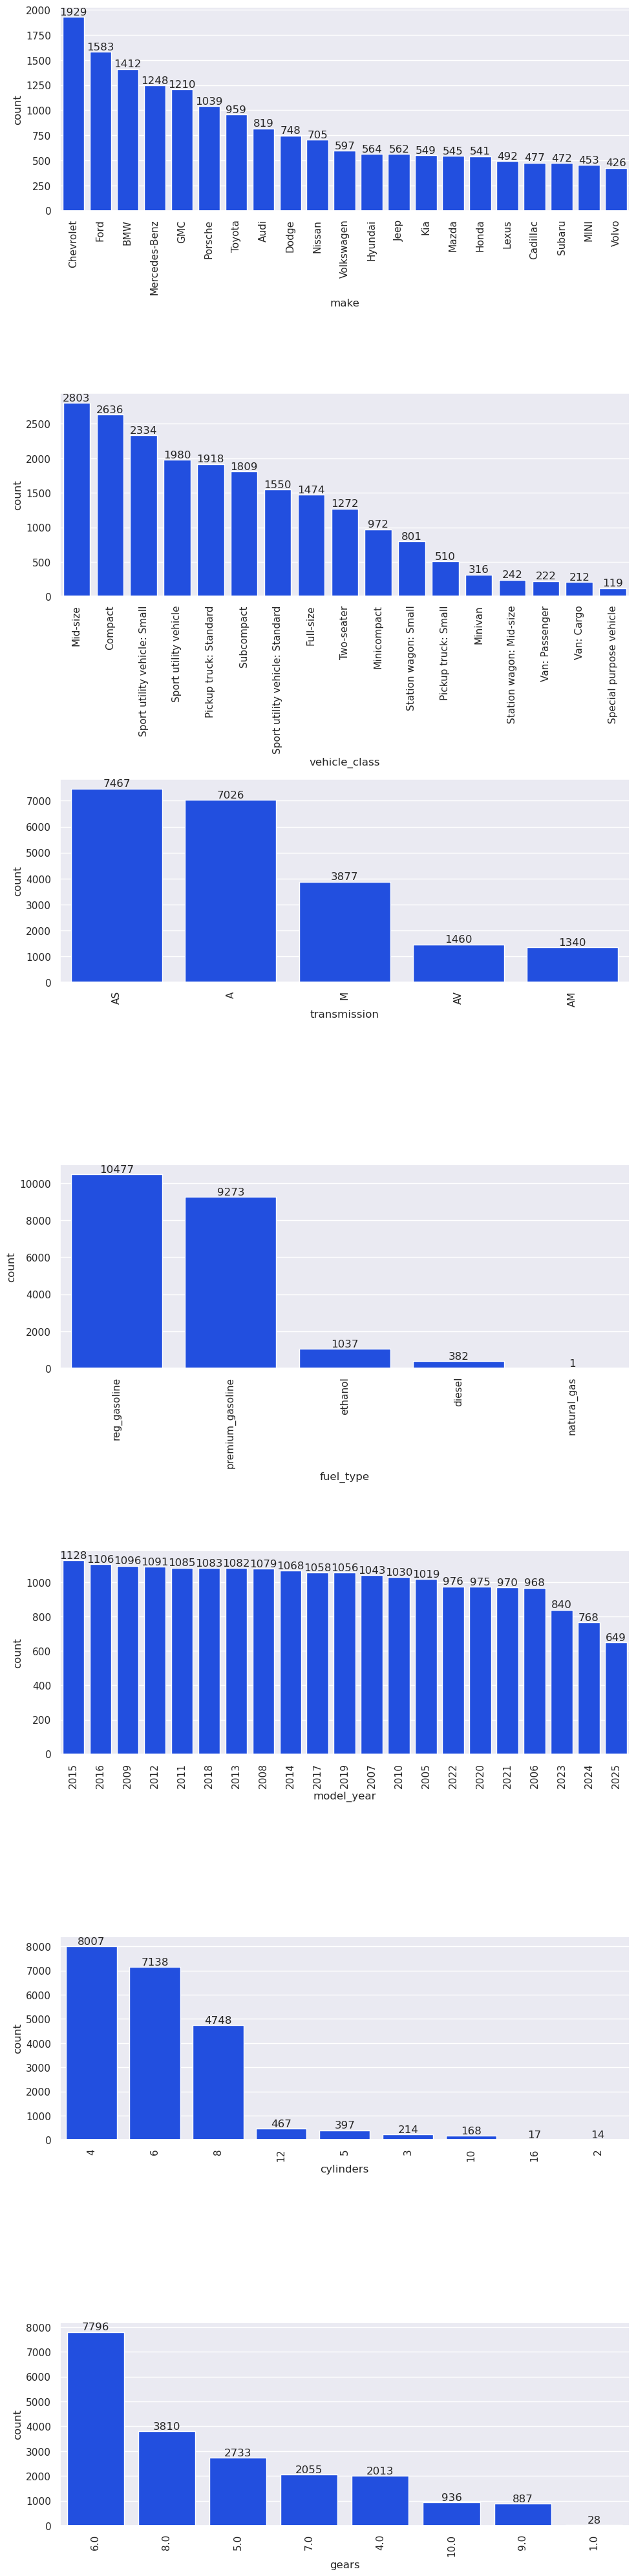

In [18]:
fig, axs = plt.subplots(7, 1, figsize=(10, 40))

for ax, coluna in zip(axs.flatten(), categoricas):
    sns.countplot(
        data=df,
        x=coluna,
        ax=ax,
        order=df[coluna].value_counts().index[:21]
    )
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

In [19]:
df[df["gears"] == 1]

,model_year,make,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,co2_emissions_g_km,co2_rating,smog_rating,gears
17419,2021,Hyundai,Mid-size,2.0,4,AV,reg_gasoline,7.5,5.7,6.7,157,7.0,5.0,1.0
17420,2021,Hyundai,Mid-size,2.0,4,AV,reg_gasoline,7.1,5.5,6.4,152,8.0,5.0,1.0
17443,2021,Hyundai,Mid-size,1.6,4,AV,reg_gasoline,7.9,7.0,7.5,178,7.0,5.0,1.0
17512,2021,Kia,Compact,1.6,4,AV,reg_gasoline,7.2,6.0,6.7,159,7.0,3.0,1.0
18394,2022,Hyundai,Mid-size,2.0,4,AV,reg_gasoline,7.6,5.7,6.7,158,7.0,5.0,1.0
18395,2022,Hyundai,Mid-size,2.0,4,AV,reg_gasoline,7.1,5.5,6.4,151,7.0,5.0,1.0
18421,2022,Hyundai,Mid-size,1.6,4,AV,reg_gasoline,7.9,6.9,7.5,176,7.0,5.0,1.0
18490,2022,Kia,Compact,1.6,4,AV,reg_gasoline,7.2,6.0,6.7,159,7.0,3.0,1.0
19326,2023,Hyundai,Mid-size,2.0,4,AV,reg_gasoline,7.6,5.7,6.7,158,7.0,5.0,1.0
19327,2023,Hyundai,Mid-size,2.0,4,AV,reg_gasoline,7.1,5.5,6.4,151,7.0,5.0,1.0


In [20]:
pd.crosstab(df["gears"], df["transmission"], dropna=False)

transmission,A,AM,AS,AV,M
gears,,,,,
1.0,0,0,0,28,0
4.0,1850,0,162,0,1
5.0,889,6,673,0,1165
6.0,1946,223,2899,171,2557
7.0,276,845,621,159,154
8.0,1042,260,2363,145,0
9.0,699,6,182,0,0
10.0,324,0,567,45,0
NaN,0,0,0,912,0


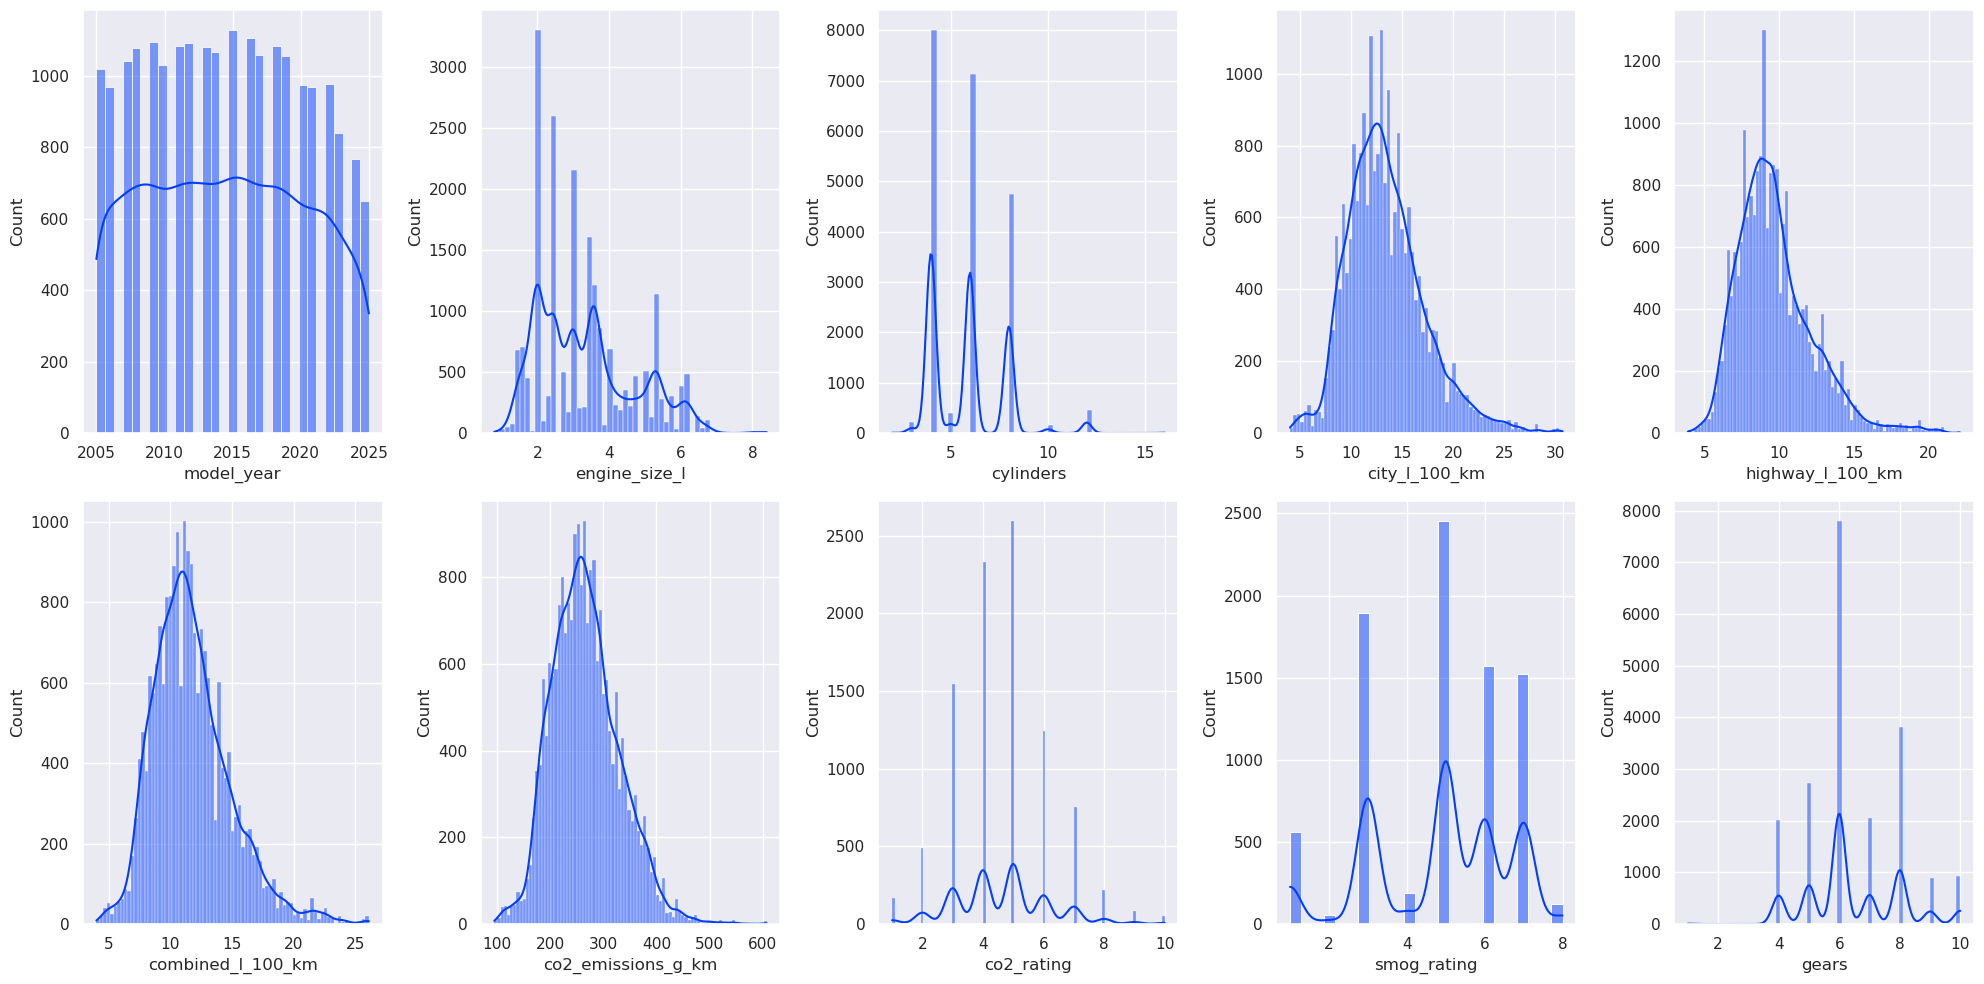

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.histplot(data=df, x=coluna, ax=ax, kde=True)

plt.tight_layout()
plt.show()

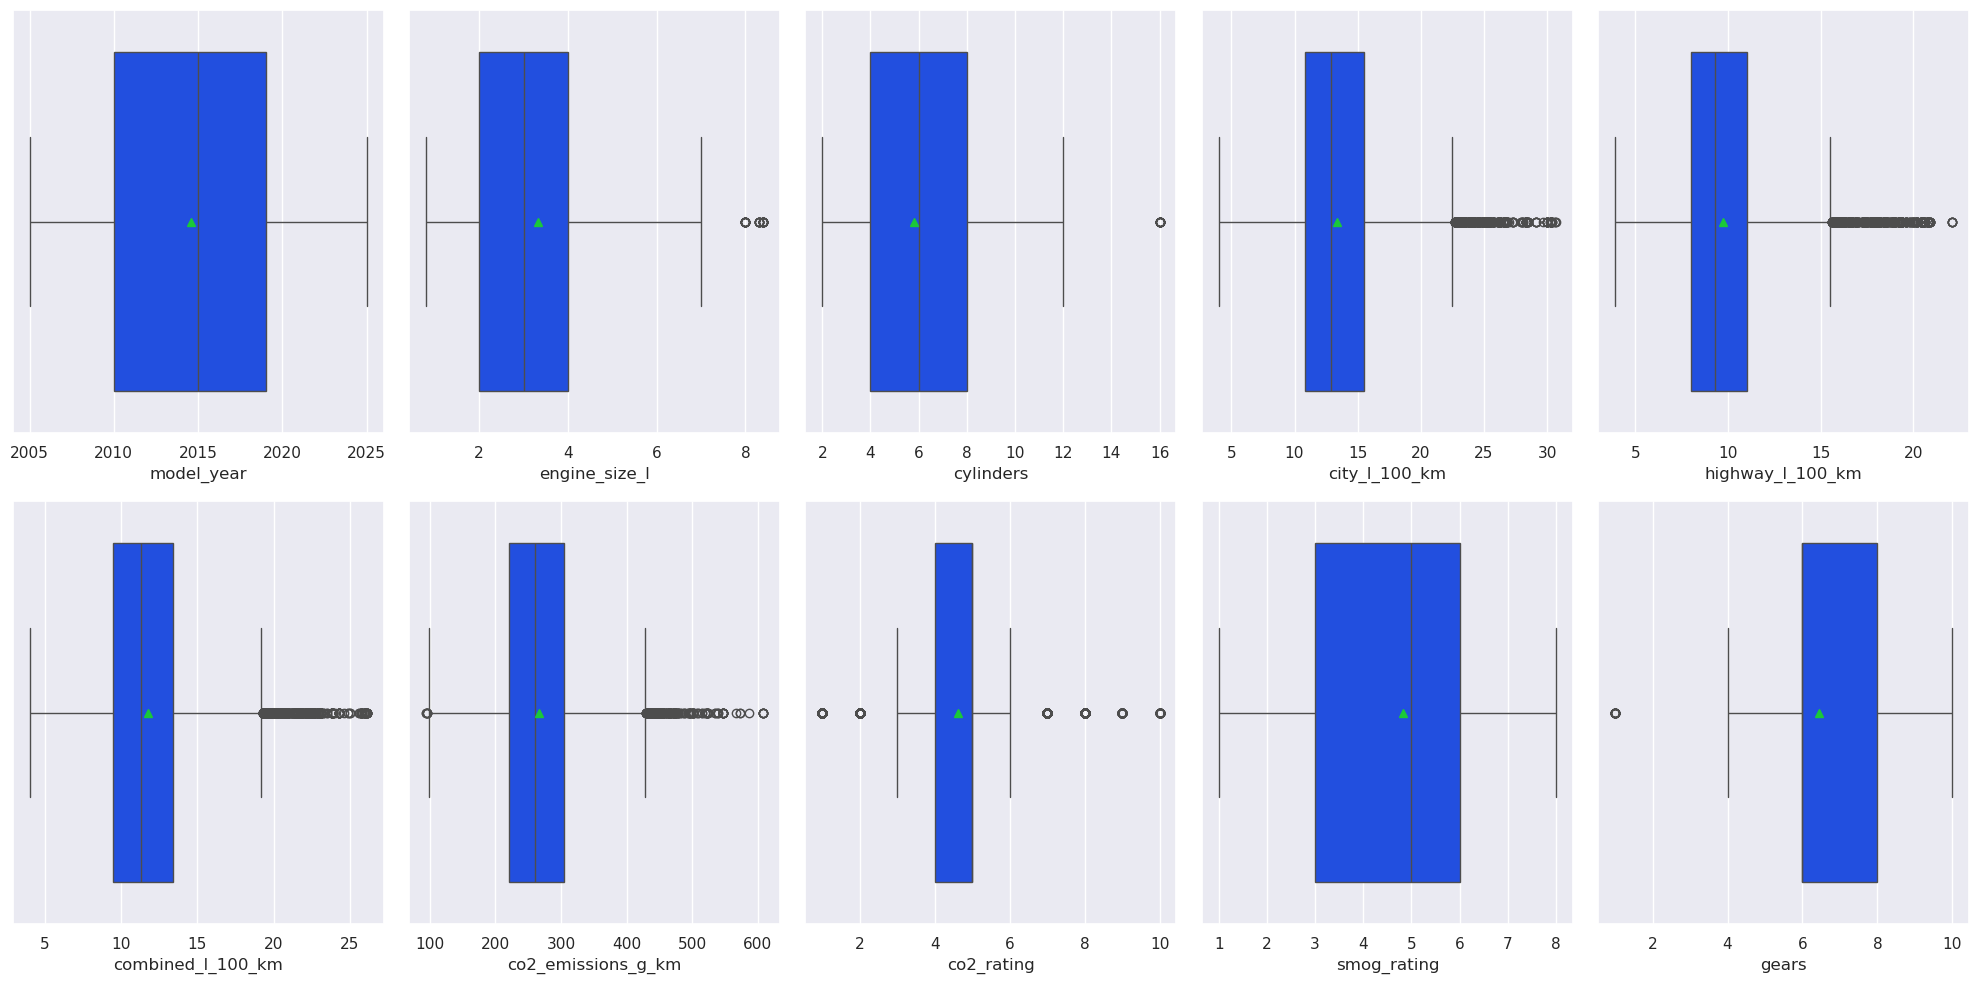

In [22]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True)

plt.tight_layout()
plt.show()

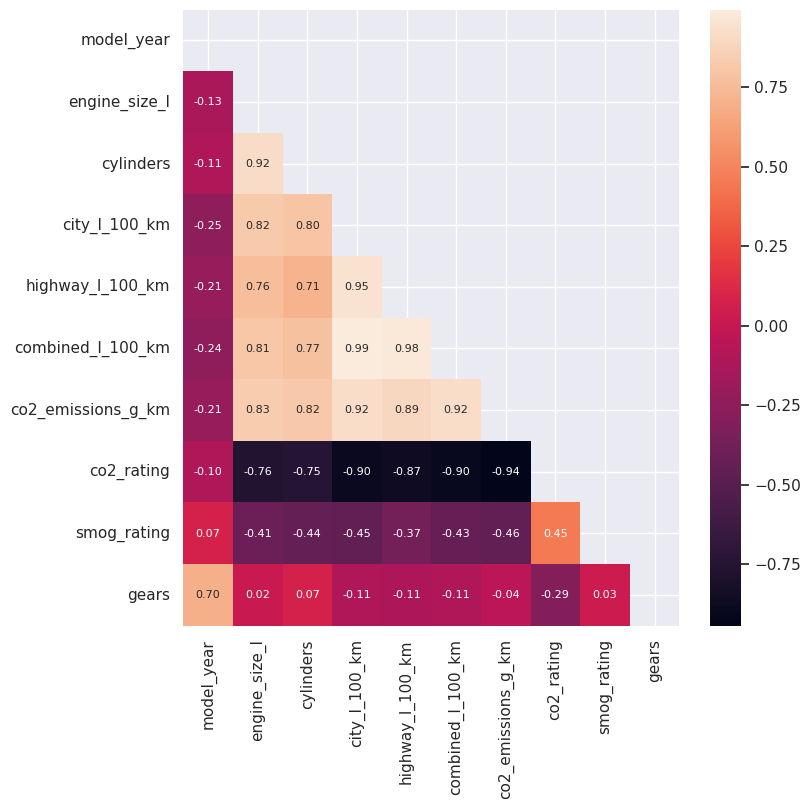

In [23]:
corr = df.select_dtypes("number").corr()

matriz = np.triu(corr)

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    corr,
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    annot_kws={"fontsize": 8}
)

plt.show()

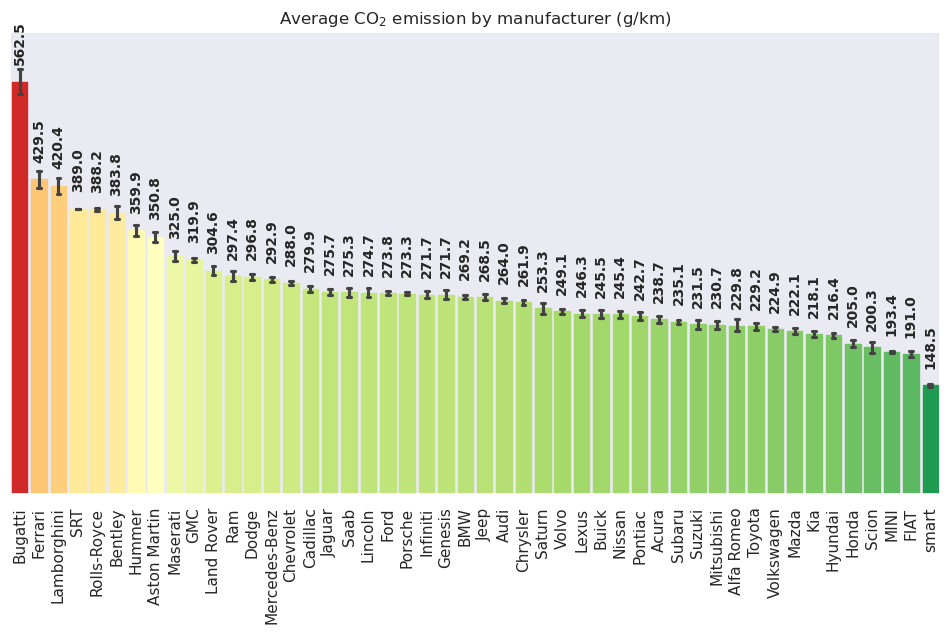

In [24]:
co2_latex = r"CO$_2$"

fig, ax = plt.subplots(figsize=(12, 6))

# gráfico de barras
sns.barplot(
    data=df,
    x="make",
    y="co2_emissions_g_km",
    ax=ax,
    order=df.groupby("make")["co2_emissions_g_km"].mean().sort_values(ascending=False).index,
    capsize=0.2
)

# anotação dos valores nas barras
ax.bar_label(
    ax.containers[0],
    fmt="%.1f",
    rotation=90,
    padding=12,
    size=10,
    weight="bold"
)

# retirando labels e colocando título
ax.set_ylim(0, 630)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])
ax.set_title(f"Average {co2_latex} emission by manufacturer (g/km)")
plt.xticks(rotation=90)

# escala de cores
norm = mcolors.Normalize(
    vmin=df["co2_emissions_g_km"].min(),
    vmax=df["co2_emissions_g_km"].max(),
)
cmap = cm.RdYlGn_r

for barra in ax.patches:
    barra.set_color(cmap(norm(barra.get_height())))

plt.show()

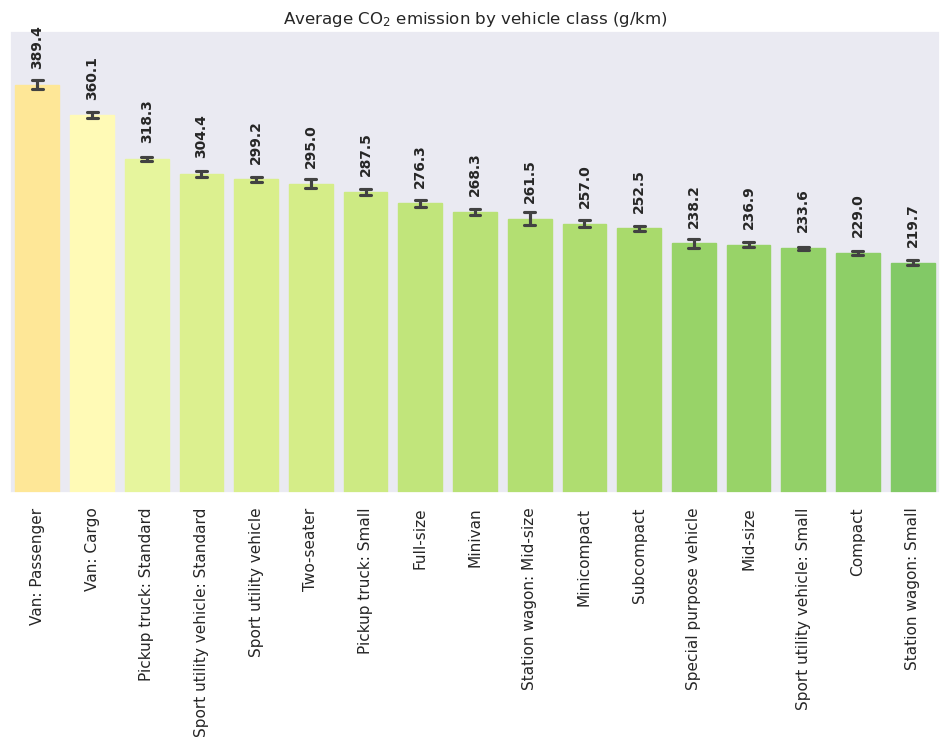

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

# gráfico de barras
sns.barplot(
    data=df,
    x="vehicle_class",
    y="co2_emissions_g_km",
    ax=ax,
    order=df.groupby("vehicle_class")["co2_emissions_g_km"].mean().sort_values(ascending=False).index,
    capsize=0.2
)

# anotação dos valores nas barras
ax.bar_label(
    ax.containers[0],
    fmt="%.1f",
    rotation=90,
    padding=12,
    size=10,
    weight="bold"
)

# retirando labels e colocando título
ax.set_ylim(0, 440)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])
ax.set_title(f"Average {co2_latex} emission by vehicle class (g/km)")
plt.xticks(rotation=90)

# escala de cores
norm = mcolors.Normalize(
    vmin=df["co2_emissions_g_km"].min(),
    vmax=df["co2_emissions_g_km"].max(),
)
cmap = cm.RdYlGn_r

for barra in ax.patches:
    barra.set_color(cmap(norm(barra.get_height())))

plt.show()

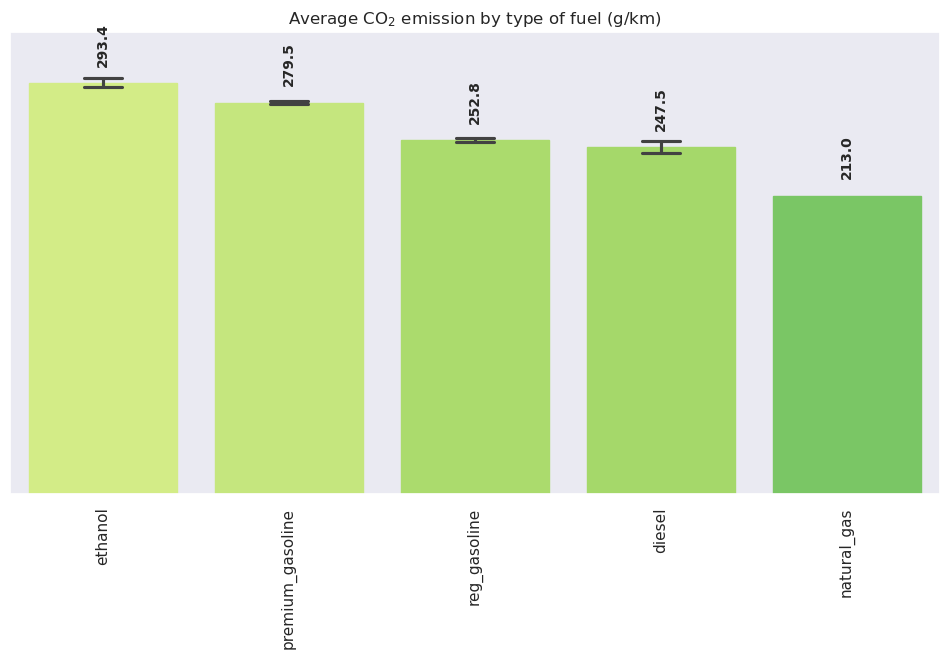

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

# gráfico de barras
sns.barplot(
    data=df,
    x="fuel_type",
    y="co2_emissions_g_km",
    ax=ax,
    order=df.groupby("fuel_type")["co2_emissions_g_km"].mean().sort_values(ascending=False).index,
    capsize=0.2
)

# anotação dos valores nas barras
ax.bar_label(
    ax.containers[0],
    fmt="%.1f",
    rotation=90,
    padding=12,
    size=10,
    weight="bold"
)

# retirando labels e colocando título
ax.set_ylim(0, 330)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])
ax.set_title(f"Average {co2_latex} emission by type of fuel (g/km)")
plt.xticks(rotation=90)

# escala de cores
norm = mcolors.Normalize(
    vmin=df["co2_emissions_g_km"].min(),
    vmax=df["co2_emissions_g_km"].max(),
)
cmap = cm.RdYlGn_r

for barra in ax.patches:
    barra.set_color(cmap(norm(barra.get_height())))

plt.show()

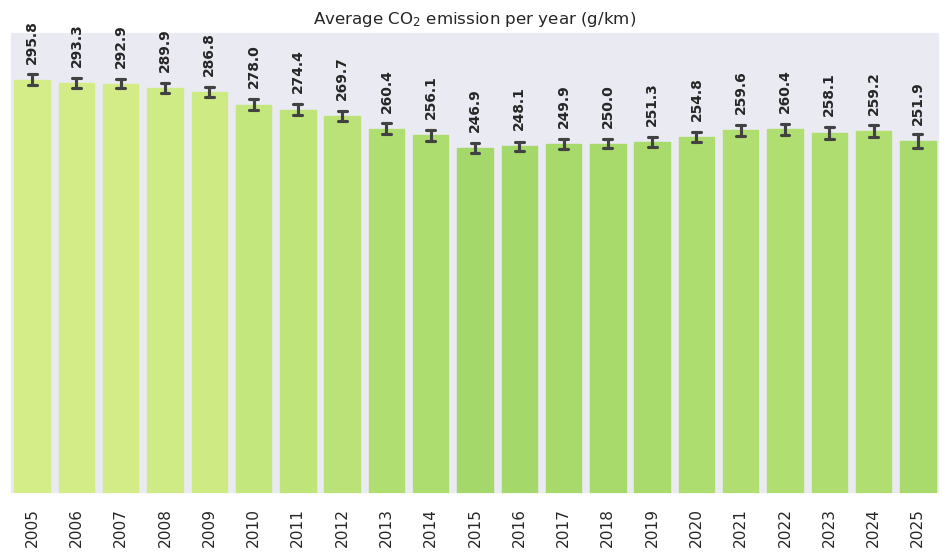

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

# gráfico de barras
sns.barplot(
    data=df,
    x="model_year",
    y="co2_emissions_g_km",
    ax=ax,
    capsize=0.2
)

# anotação dos valores nas barras
ax.bar_label(
    ax.containers[0],
    fmt="%.1f",
    rotation=90,
    padding=12,
    size=10,
    weight="bold"
)

# retirando labels e colocando título
ax.set_ylim(0, 330)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])
ax.set_title(f"Average {co2_latex} emission per year (g/km)")
plt.xticks(rotation=90)

# escala de cores
norm = mcolors.Normalize(
    vmin=df["co2_emissions_g_km"].min(),
    vmax=df["co2_emissions_g_km"].max(),
)
cmap = cm.RdYlGn_r

for barra in ax.patches:
    barra.set_color(cmap(norm(barra.get_height())))

plt.show()

In [28]:
pd.crosstab(df["model_year"], df["vehicle_class"])

vehicle_class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,Special purpose vehicle,Sport utility vehicle,Sport utility vehicle: Small,Sport utility vehicle: Standard,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater,Van: Cargo,Van: Passenger
model_year,,,,,,,,,,,,,,,,,
2005,146,45,114,74,33,0,127,0,224,0,0,38,54,87,52,13,12
2006,137,56,111,37,35,0,141,0,221,0,0,28,53,78,49,14,8
2007,116,54,139,47,34,0,154,0,240,0,0,32,44,83,61,27,12
2008,148,63,134,49,22,52,72,0,267,0,0,18,43,100,73,26,12
2009,152,68,125,43,16,59,95,0,268,0,0,13,56,99,64,26,12
2010,144,77,120,41,14,54,73,1,251,0,0,9,63,98,59,18,8
2011,128,71,132,53,14,51,85,1,270,0,0,4,59,104,64,22,27
2012,137,81,132,76,16,43,79,2,239,0,0,5,50,102,76,22,31
2013,175,77,157,53,15,12,84,5,0,139,109,3,47,96,58,22,30


In [29]:
pd.crosstab(df["model_year"], df["fuel_type"])

fuel_type,diesel,ethanol,natural_gas,premium_gasoline,reg_gasoline
model_year,,,,,
2005,14,30,0,432,543
2006,12,23,0,389,544
2007,5,53,0,429,556
2008,5,48,0,480,546
2009,10,71,0,439,576
2010,14,71,0,408,537
2011,15,104,0,421,545
2012,16,104,0,432,539
2013,19,110,0,429,524


In [30]:
df[df["fuel_type"] == "natural_gas"]

,model_year,make,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,co2_emissions_g_km,co2_rating,smog_rating,gears
11925,2016,Chevrolet,Mid-size,3.6,6,AS,natural_gas,15.2,9.5,12.7,213,6.0,NaN,6.0


In [31]:
df = df.drop(df[df["fuel_type"] == "natural_gas"].index)

df["fuel_type"].value_counts()

fuel_type
reg_gasoline        10477
premium_gasoline     9273
ethanol              1037
diesel                382
Name: count, dtype: int64

In [32]:
pd.crosstab(df["model_year"], df["fuel_type"]).style.background_gradient(cmap="coolwarm")

fuel_type,diesel,ethanol,premium_gasoline,reg_gasoline
model_year,,,,
2005,14,30,432,543
2006,12,23,389,544
2007,5,53,429,556
2008,5,48,480,546
2009,10,71,439,576
2010,14,71,408,537
2011,15,104,421,545
2012,16,104,432,539
2013,19,110,429,524


In [33]:
pd.crosstab(
    df["model_year"], df["fuel_type"], values=df["co2_emissions_g_km"], aggfunc="mean"
).style.background_gradient(cmap="RdYlGn_r", axis=None)

fuel_type,diesel,ethanol,premium_gasoline,reg_gasoline
model_year,,,,
2005,215.000000,338.666667,299.574074,292.445672
2006,196.750000,330.826087,297.133676,291.117647
2007,297.400000,318.113208,296.916084,287.377698
2008,300.200000,310.083333,297.243750,281.556777
2009,251.300000,297.070423,301.733485,274.781250
2010,248.214286,297.507042,298.546569,260.620112
2011,247.266667,300.288462,286.159145,261.179817
2012,244.187500,301.125000,280.636574,255.552876
2013,236.684211,296.372727,270.165501,245.748092


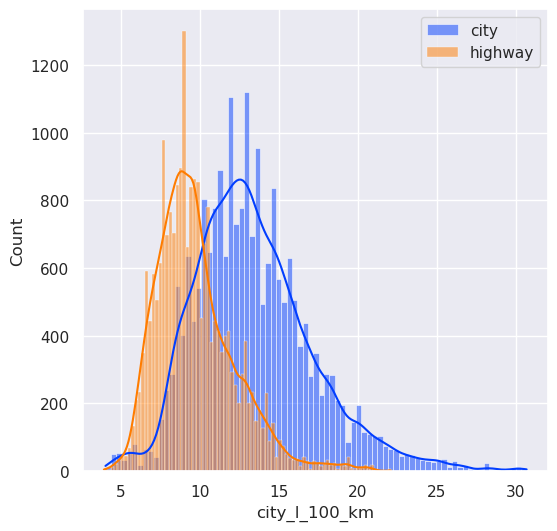

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.histplot(data=df, x="city_l_100_km", kde=True, ax=ax, label="city")
sns.histplot(data=df, x="highway_l_100_km", kde=True, ax=ax, label="highway")

plt.legend()
plt.show()

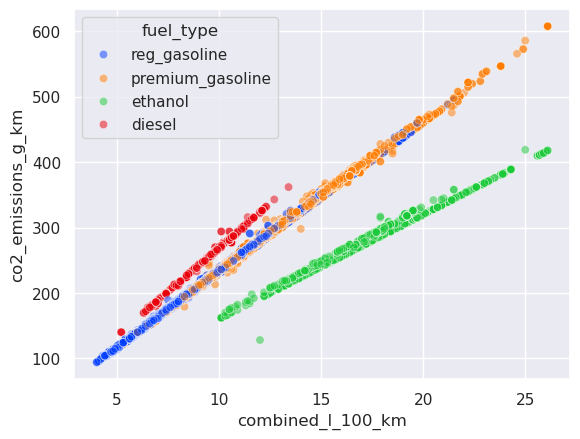

In [35]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    x="combined_l_100_km",
    y="co2_emissions_g_km",
    ax=ax,
    hue="fuel_type",
    alpha=0.5
)

plt.show()

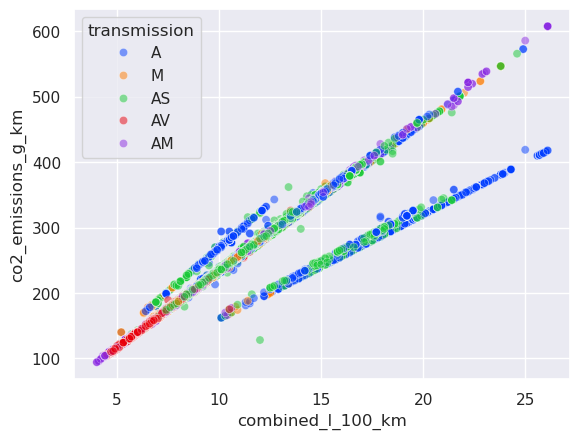

In [36]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    x="combined_l_100_km",
    y="co2_emissions_g_km",
    ax=ax,
    hue="transmission",
    alpha=0.5
)

plt.show()

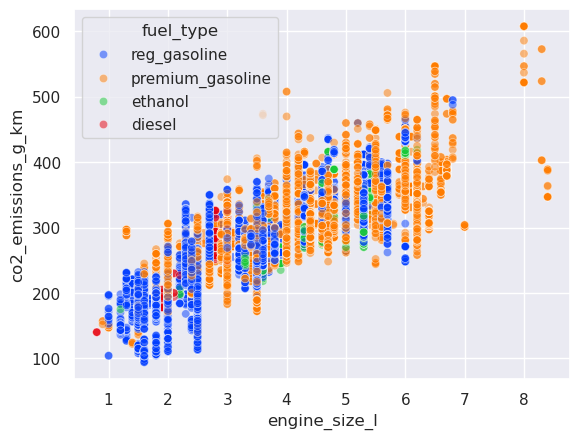

In [37]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    x="engine_size_l",
    y="co2_emissions_g_km",
    ax=ax,
    hue="fuel_type",
    alpha=0.5
)

plt.show()

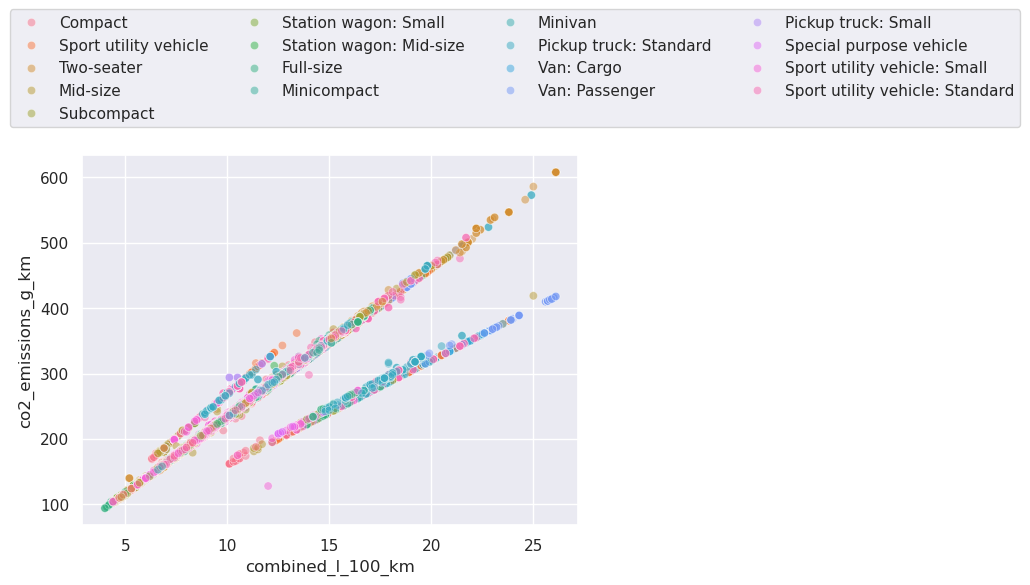

In [38]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    x="combined_l_100_km",
    y="co2_emissions_g_km",
    ax=ax,
    hue="vehicle_class",
    alpha=0.5
)

ax.legend(loc="upper left", bbox_to_anchor=(0, 1.2), ncol=4, bbox_transform=fig.transFigure)

plt.show()

In [39]:
class_map = {
    "Two-seater": "car",
    "Minicompact": "car",
    "Subcompact": "car",
    "Compact": "car",
    "Mid-size": "car",
    "Full-size": "car",
    "Station wagon: Small": "station_wagon",
    "Station wagon: Mid-size": "station_wagon",
    "Pickup truck: Small": "pickup_truck",
    "Pickup truck: Standard": "pickup_truck",
    "Sport utility vehicle": "suv",
    "Sport utility vehicle: Small": "suv",
    "Sport utility vehicle: Standard": "suv",
    "Minivan": "van",
    "Van: Cargo": "van",
    "Van: Passenger": "van",
    "Special purpose vehicle": "special_purpose",
}

df["vehicle_class_grouped"] = df["vehicle_class"].map(class_map)

df["vehicle_class_grouped"].value_counts(dropna=False)

vehicle_class_grouped
car                10965
suv                 5864
pickup_truck        2428
station_wagon       1043
van                  750
special_purpose      119
Name: count, dtype: int64

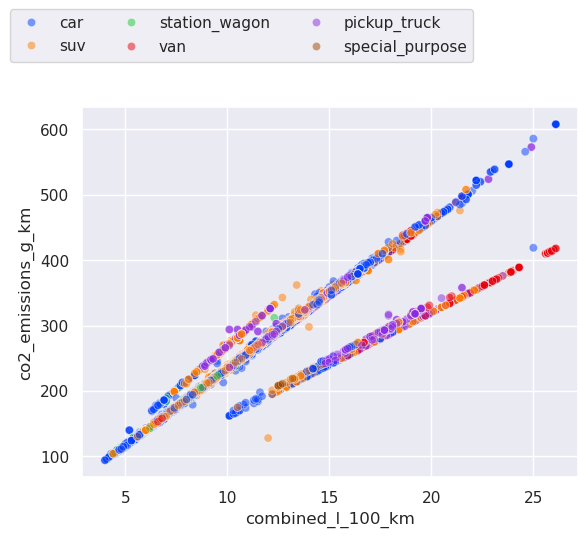

In [40]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    x="combined_l_100_km",
    y="co2_emissions_g_km",
    ax=ax,
    hue="vehicle_class_grouped",
    alpha=0.5
)

ax.legend(loc="upper left", bbox_to_anchor=(0, 1.1), ncol=3, bbox_transform=fig.transFigure)

plt.show()

In [41]:
pd.crosstab(df["vehicle_class_grouped"], df["fuel_type"])

fuel_type,diesel,ethanol,premium_gasoline,reg_gasoline
vehicle_class_grouped,,,,
car,104,197,6853,3811
pickup_truck,111,332,126,1859
special_purpose,0,15,21,83
station_wagon,28,1,456,558
suv,139,295,1814,3616
van,0,197,3,550


In [42]:
df = df.drop(
    columns=[
        "make",
        "co2_rating",
        "smog_rating",
        "gears",
        "vehicle_class",
    ]
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21169 entries, 0 to 21169
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_year             21169 non-null  int64  
 1   engine_size_l          21169 non-null  float64
 2   cylinders              21169 non-null  int64  
 3   transmission           21169 non-null  object 
 4   fuel_type              21169 non-null  object 
 5   city_l_100_km          21169 non-null  float64
 6   highway_l_100_km       21169 non-null  float64
 7   combined_l_100_km      21169 non-null  float64
 8   co2_emissions_g_km     21169 non-null  int64  
 9   vehicle_class_grouped  21169 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 1.8+ MB


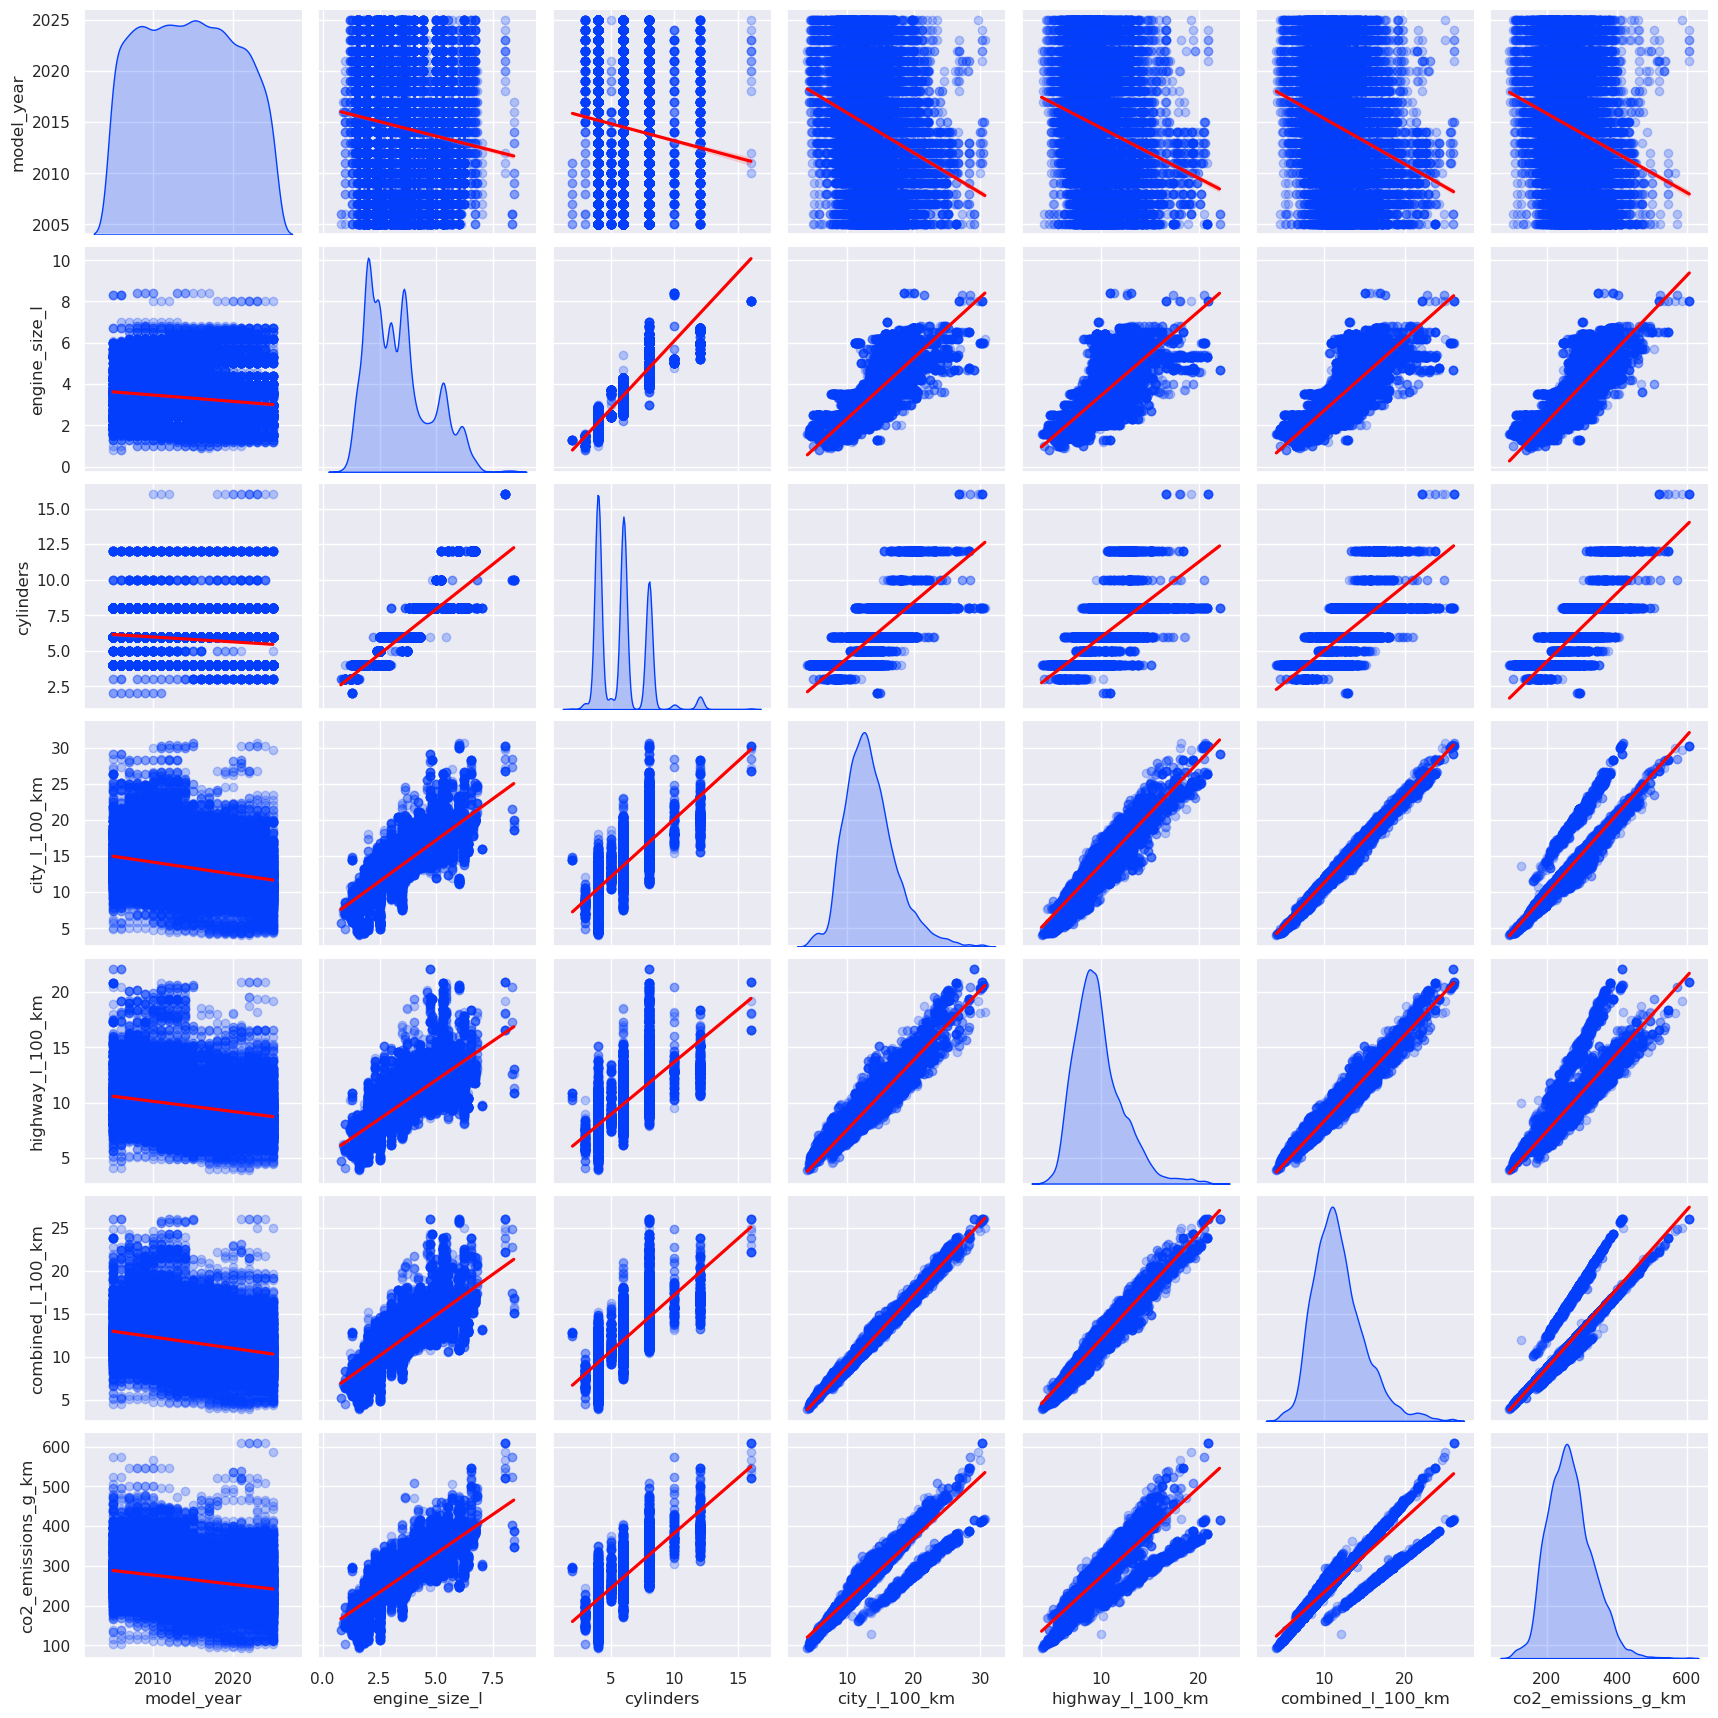

In [43]:
sns.pairplot(
    df,
    kind="reg",
    diag_kind="kde",
    plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.25}}
)

In [44]:
df.nunique()

model_year                21
engine_size_l             61
cylinders                  9
transmission               5
fuel_type                  4
city_l_100_km            238
highway_l_100_km         168
combined_l_100_km        207
co2_emissions_g_km       376
vehicle_class_grouped      6
dtype: int64

In [45]:
df["engine_size_l"].value_counts()

engine_size_l
2.0    3306
3.0    2155
2.5    1479
3.5    1454
3.6    1211
       ... 
2.1       5
2.6       4
0.8       3
0.9       3
5.8       2
Name: count, Length: 61, dtype: int64

In [46]:
df["engine_size_l"].value_counts(bins=4).sort_index()

(0.791, 2.7]    8717
(2.7, 4.6]      8273
(4.6, 6.5]      3978
(6.5, 8.4]       201
Name: count, dtype: int64

In [47]:
df["engine_size_l_class"] = pd.cut(
    df["engine_size_l"],
    bins=[-np.inf, 2.0, 4.0, 6.0, np.inf],
    labels=["up_to_2", "up_to_4", "up_to_6", "more_than_6"],
)

df["engine_size_l_class"].value_counts().sort_index()

engine_size_l_class
up_to_2         5318
up_to_4        10677
up_to_6         4320
more_than_6      854
Name: count, dtype: int64

In [48]:
df["cylinders"].value_counts()

cylinders
4     8007
6     7137
8     4748
12     467
5      397
3      214
10     168
16      17
2       14
Name: count, dtype: int64

In [49]:
df["cylinders_class"] = pd.cut(
    df["cylinders"],
    bins=[-np.inf, 4, 6, 8, np.inf],
    labels=["up_to_4", "up_to_6", "up_to_8", "more_than_8"],
)

df["cylinders_class"].value_counts().sort_index()

cylinders_class
up_to_4        8235
up_to_6        7534
up_to_8        4748
more_than_8     652
Name: count, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21169 entries, 0 to 21169
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   model_year             21169 non-null  int64   
 1   engine_size_l          21169 non-null  float64 
 2   cylinders              21169 non-null  int64   
 3   transmission           21169 non-null  object  
 4   fuel_type              21169 non-null  object  
 5   city_l_100_km          21169 non-null  float64 
 6   highway_l_100_km       21169 non-null  float64 
 7   combined_l_100_km      21169 non-null  float64 
 8   co2_emissions_g_km     21169 non-null  int64   
 9   vehicle_class_grouped  21169 non-null  object  
 10  engine_size_l_class    21169 non-null  category
 11  cylinders_class        21169 non-null  category
dtypes: category(2), float64(4), int64(3), object(3)
memory usage: 1.8+ MB


In [51]:
df = df.drop(columns=["engine_size_l", "cylinders"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21169 entries, 0 to 21169
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   model_year             21169 non-null  int64   
 1   transmission           21169 non-null  object  
 2   fuel_type              21169 non-null  object  
 3   city_l_100_km          21169 non-null  float64 
 4   highway_l_100_km       21169 non-null  float64 
 5   combined_l_100_km      21169 non-null  float64 
 6   co2_emissions_g_km     21169 non-null  int64   
 7   vehicle_class_grouped  21169 non-null  object  
 8   engine_size_l_class    21169 non-null  category
 9   cylinders_class        21169 non-null  category
dtypes: category(2), float64(3), int64(2), object(3)
memory usage: 1.5+ MB


In [52]:
df.to_parquet(DADOS_TRATADOS, index=False)